# Propos préliminaire
L'objectif de ce script est d'utiliser le scraping réalisé par Nathann Cohen en complément de nos propres données. Nous téléchargons les données depuis son site, puis proposons quelques statistiques descriptives

# 1. Téléchargement de la base et mise en place

In [2]:
import requests
import pandas as pd

## 1.1 Fetching the JSON data
# URL to Nathann Cohen's website. Filters : cabinet, JSON
json_url = "https://jorfsearch.steinertriples.ch/tag/cabinet?format=JSON"

# Fetch the JSON data from the URL
response = requests.get(json_url)
if response.status_code == 200:
    # Save the JSON data to a local file
    with open("nominations.json", "w", encoding="utf-8") as file:
        file.write(response.text)
    print("JSON data downloaded and saved to 'nominations.json'.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


## 2. Converting it to a working panda
with open("nominations.json", "r", encoding="utf-8") as file:
    data = pd.read_json(file)

nominations = pd.DataFrame(data)
print(nominations.head())

JSON data downloaded and saved to 'nominations.json'.
                                       organisations source_date  \
0  [{'nom': 'Cabinet du Premier ministre', 'wikid...  2024-12-17   
1  [{'nom': 'Cabinet du Premier ministre', 'wikid...  2024-12-17   
2  [{'nom': 'Cabinet du Premier ministre', 'wikid...  2024-12-17   
3  [{'nom': 'Cabinet du Premier ministre', 'wikid...  2024-12-17   
4  [{'nom': 'Cabinet du Premier ministre', 'wikid...  2024-12-14   

              source_id source_name  type_ordre           cabinet sexe  \
0  JORFTEXT000050785562        JORF  nomination  Premier ministre    F   
1  JORFTEXT000050785562        JORF  nomination  Premier ministre    M   
2  JORFTEXT000050785562        JORF  nomination  Premier ministre    M   
3  JORFTEXT000050785562        JORF  nomination  Premier ministre    M   
4  JORFTEXT000050774687        JORF  nomination  Premier ministre    F   

         nom           prenom           grade  ... ambassadeur  \
0   Chouffot          Nolw

In [6]:
## 1.3 Filtres afin de ne conserver que les cabinets ministériels
print(nominations.columns)

# Unique values and their counts for 'type_ordre'
type_ordre_counts = nominations['type_ordre'].value_counts()
print("Unique values in 'type_ordre' and their counts:")
print(type_ordre_counts)

# Unique values and their counts for 'cabinet_ministeriel'
cabinet_ministeriel_counts = nominations['cabinet_ministeriel'].value_counts()
print("\nUnique values in 'cabinet_ministeriel' and their counts:")
print(cabinet_ministeriel_counts)


nominations_ministerielles = nominations[
    (nominations['cabinet_ministeriel'].isna() != True) &
    (nominations['type_ordre'] == 'nomination')
]

cessations = nominations[
    (nominations['cabinet_ministeriel'].isna() != True) &
    (nominations['type_ordre'] == 'cessation de fonction')
]

# 1.4 Premiers comptes
total_nominations_ministerielles = len(nominations_ministerielles)
total_cessations = len(cessations)

# Convert 'source_date' to datetime
nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')
cessations['source_date'] = pd.to_datetime(cessations['source_date'], errors='coerce')

# Counts per year
nominations_ministerielles_per_year = nominations_ministerielles['source_date'].dt.year.value_counts().sort_index()
cessations_per_year = cessations['source_date'].dt.year.value_counts().sort_index()

# Display results
print("Total Nominations Ministerielles:", total_nominations_ministerielles)
print("Total Cessations:", total_cessations)
print("Nominations Ministerielles Per Year:\n", nominations_ministerielles_per_year)
print("Cessations Per Year:\n", cessations_per_year)



Index(['organisations', 'source_date', 'source_id', 'source_name',
       'type_ordre', 'sous-prefet', 'cabinet', 'sexe', 'nom', 'prenom',
       'a_sa_demande', 'date_debut', 'cabinet_ministeriel', 'grade',
       'date_fin', 'autorite_delegation', 'ecole', 'parlement', 'duree',
       'suppleant', 'remplacement', 'prefet',
       'secretaire_general_de_prefecture', 'sous-prefet_sous-prefecture',
       'sous-prefecture_departement_code', 'visa_emploi_superieur',
       'conseil_des_ministres', 'autres_prenoms', 'conseil_administration',
       'inspecteur_general', 'membre_gouvernement', 'ministre', 'tribunal',
       'depart_retraite', 'conseiller_affaire_etrangeres', 'ambassadeur',
       'ambassadeur_thematique', 'cour_comptes', 'magistrat', 'nom_alternatif',
       'corps', 'tribunal_administratif', 'maitre_de_conference',
       'tribunal_grande_instance', 'secretaire_affaires_etrangeres'],
      dtype='object')
Unique values in 'type_ordre' and their counts:
type_ordre
nominati

/tmp/ipykernel_38924/3816085935.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')
/tmp/ipykernel_38924/3816085935.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessations['source_date'] = pd.to_datetime(cessations['source_date'], errors='coerce')


In [18]:
## Enrichissons de la couleur politique ! 

import pandas as pd

# Data for French Prime Ministers from 1990 to 2024
data = {
    'PM': [
        'Michel Rocard', 'Édith Cresson', 'Pierre Bérégovoy', 'Édouard Balladur',
        'Alain Juppé', 'Lionel Jospin', 'Jean-Pierre Raffarin', 'Dominique de Villepin',
        'François Fillon', 'Jean-Marc Ayrault', 'Manuel Valls', 'Bernard Cazeneuve',
        'Édouard Philippe', 'Jean Castex', 'Élisabeth Borne', 'Gabriel Attal', 'Michel Barnier'
    ],
    'Start Date': [
        '1988-05-10', '1991-05-15', '1992-04-02', '1993-03-29',
        '1995-05-17', '1997-06-02', '2002-05-06', '2005-05-31',
        '2007-05-17', '2012-05-15', '2014-03-31', '2016-12-06',
        '2017-06-21', '2020-07-03', '2022-05-16', '2024-01-11', '2024-09-05'
    ],
    'End Date': [
        '1991-05-15', '1992-04-02', '1993-03-29', '1995-05-17',
        '1995-11-07', '2002-05-06', '2005-05-31', '2007-05-17',
        '2012-05-15', '2014-03-31', '2016-12-06', '2017-05-15',
        '2020-07-03', '2022-05-16', '2024-01-08', '2024-09-05', None  # None indicates incumbent
    ],
    'Party': [
        'PS', 'PS', 'PS', 'RPR',
        'RPR', 'PS', 'UMP', 'UMP',
        'UMP', 'PS', 'PS', 'PS',
        'LREM', 'LREM', 'LREM', 'LREM', 'LR'
    ],
    'Alignment': [
        'Left', 'Left', 'Left', 'Right',
        'Right', 'Left', 'Right', 'Right',
        'Right', 'Left', 'Left', 'Left',
        'Center-right', 'Center-right', 'Center-right', 'Center-right', 'Right'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Start Date' and 'End Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Display the DataFrame
print(df)


                       PM Start Date   End Date Party     Alignment
0           Michel Rocard 1988-05-10 1991-05-15    PS          Left
1           Édith Cresson 1991-05-15 1992-04-02    PS          Left
2        Pierre Bérégovoy 1992-04-02 1993-03-29    PS          Left
3        Édouard Balladur 1993-03-29 1995-05-17   RPR         Right
4             Alain Juppé 1995-05-17 1995-11-07   RPR         Right
5           Lionel Jospin 1997-06-02 2002-05-06    PS          Left
6    Jean-Pierre Raffarin 2002-05-06 2005-05-31   UMP         Right
7   Dominique de Villepin 2005-05-31 2007-05-17   UMP         Right
8         François Fillon 2007-05-17 2012-05-15   UMP         Right
9       Jean-Marc Ayrault 2012-05-15 2014-03-31    PS          Left
10           Manuel Valls 2014-03-31 2016-12-06    PS          Left
11      Bernard Cazeneuve 2016-12-06 2017-05-15    PS          Left
12       Édouard Philippe 2017-06-21 2020-07-03  LREM  Center-right
13            Jean Castex 2020-07-03 2022-05-16 

In [19]:
## On apparie les deux bases

# Ensure 'date_debut' in nominations_ministerielles is in datetime format
nominations_ministerielles['date_debut'] = pd.to_datetime(nominations_ministerielles['date_debut'], errors='coerce')

# Perform a cross join to compare every row in nominations_ministerielles with every row in df
nominations_with_political_alignment = nominations_ministerielles.assign(key=1).merge(
    df.assign(key=1), on='key'
).drop('key', axis=1)

# Filter rows where 'date_debut' falls between 'Start Date' and 'End Date'
nominations_with_political_alignment = nominations_with_political_alignment[
    (nominations_with_political_alignment['date_debut'] >= nominations_with_political_alignment['Start Date']) &
    (nominations_with_political_alignment['date_debut'] <= nominations_with_political_alignment['End Date'])
]

# Drop unnecessary columns and reset index for cleaner results
nominations_with_political_alignment = nominations_with_political_alignment.drop(
    ['Start Date', 'End Date'], axis=1
).reset_index(drop=True)

# Display the merged DataFrame
print(nominations_with_political_alignment)


/tmp/ipykernel_38924/462788230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['date_debut'] = pd.to_datetime(nominations_ministerielles['date_debut'], errors='coerce')


     organisations source_date             source_id source_name  type_ordre  \
0               []  2024-08-30  JORFTEXT000050148223        JORF  nomination   
1               []  2024-08-24  JORFTEXT000050133926        JORF  nomination   
2               []  2024-07-31  JORFTEXT000050060447        JORF  nomination   
3               []  2024-07-18  JORFTEXT000050011569        JORF  nomination   
4               []  2024-07-13  JORFTEXT000049963270        JORF  nomination   
...            ...         ...                   ...         ...         ...   
4483            []  1990-05-23  JORFTEXT000000159814        JORF  nomination   
4484            []  1990-05-23  JORFTEXT000000159814        JORF  nomination   
4485            []  1990-05-15  JORFTEXT000000708891        JORF  nomination   
4486            []  1990-04-20  JORFTEXT000000349222        JORF  nomination   
4487            []  1990-03-24  JORFTEXT000000349503        JORF  nomination   

     sous-prefet                       

Nous avons moins de cessation que de nominations : il n'est pas certain que ces données soient homogènes, donc nous allons rester sur les nominations. 

# 2. Statistiques descriptives
## 2.1 Evolutions du nombre de nominations

/tmp/ipykernel_38924/1021414675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')
/tmp/ipykernel_38924/1021414675.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)  # Add the legend


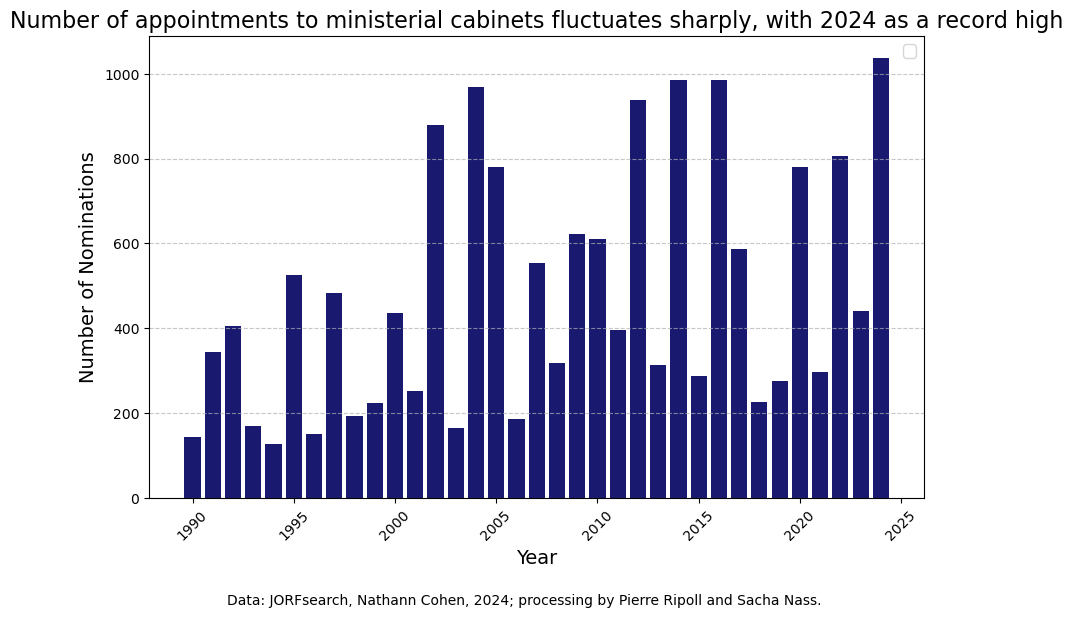

In [13]:
import matplotlib.pyplot as plt

# Ensure 'source_date' is in datetime format
nominations_ministerielles['source_date'] = pd.to_datetime(nominations_ministerielles['source_date'], errors='coerce')

# Count nominations per year
nominations_per_year = nominations_ministerielles['source_date'].dt.year.value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(nominations_per_year.index, nominations_per_year.values, color='MidnightBlue')
plt.title("Number of appointments to ministerial cabinets fluctuates sharply, with 2024 as a record high", fontsize=16)
plt.suptitle("Data: JORFsearch, Nathann Cohen, 2024; processing by Pierre Ripoll and Sacha Nass.", fontsize=10, y=-0.05) 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)  # Add the legend
plt.show()


## 2.2. Une féminisation des cabinets ministériels ... 

/tmp/ipykernel_38924/1540498185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominations_ministerielles['year'] = nominations_ministerielles['source_date'].dt.year


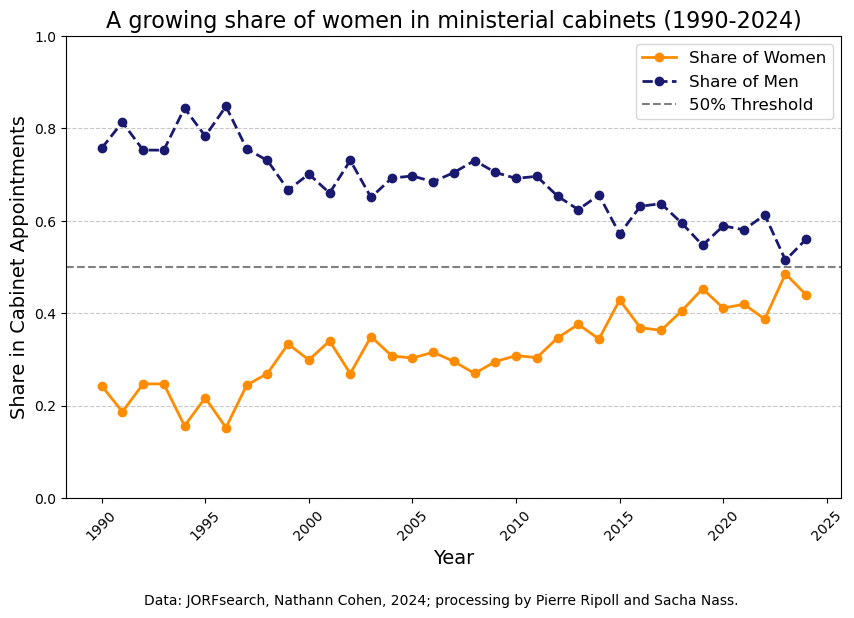

In [14]:
# Extract year and filter valid data
nominations_ministerielles['year'] = nominations_ministerielles['source_date'].dt.year
valid_nominations = nominations_ministerielles.dropna(subset=['year', 'sexe'])

# Calculate the share of 'F' and 'M' per year
shares_per_year = valid_nominations.groupby('year')['sexe'].value_counts(normalize=True).unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(shares_per_year.index, shares_per_year['F'], label="Share of Women", color='darkorange', marker='o', linestyle='-', linewidth=2)
plt.plot(shares_per_year.index, shares_per_year['M'], label="Share of Men", color='MidnightBlue', marker='o', linestyle='--', linewidth=2)

# Customize the plot
plt.title("A growing share of women in ministerial cabinets (1990-2024)", fontsize=16)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, label="50% Threshold")
plt.suptitle("Data: JORFsearch, Nathann Cohen, 2024; processing by Pierre Ripoll and Sacha Nass.", fontsize=10, y=-0.05)  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share in Cabinet Appointments', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Shares are between 0 and 1
plt.show()


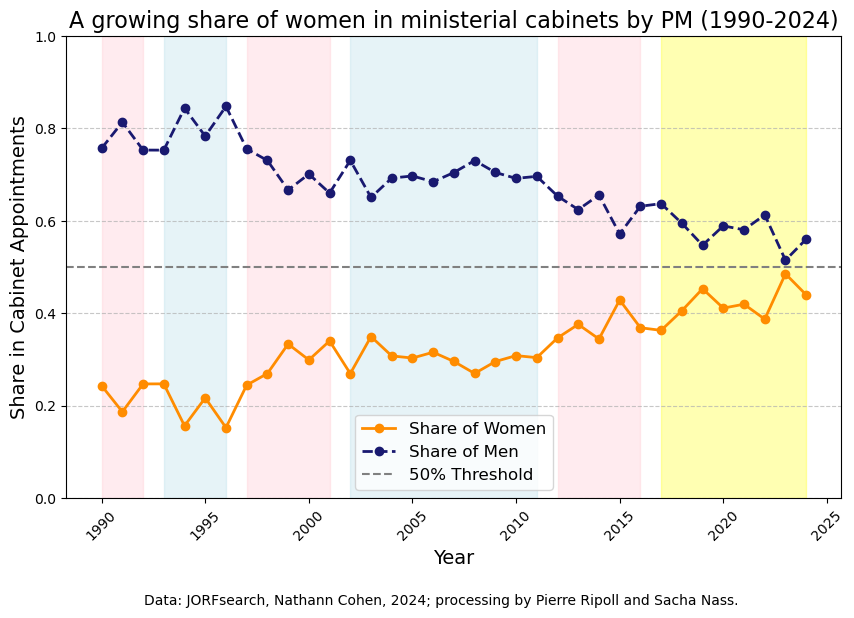

In [30]:
## La version par PM

# Extract year and filter valid data
nominations_with_political_alignment['year'] = nominations_with_political_alignment['source_date'].dt.year
valid_nominations = nominations_with_political_alignment.dropna(subset=['year', 'sexe','PM', 'Alignment'])

# Calculate the share of 'F' and 'M' per year
shares_per_year_pm = (
    valid_nominations.groupby(['year', 'PM'])['sexe']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

alignments = valid_nominations.groupby(['year', 'PM'])['Alignment'].first().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(shares_per_year.index, shares_per_year['F'], label="Share of Women", color='darkorange', marker='o', linestyle='-', linewidth=2)
plt.plot(shares_per_year.index, shares_per_year['M'], label="Share of Men", color='MidnightBlue', marker='o', linestyle='--', linewidth=2)

plt.axvspan(1990, 1992, color='pink', alpha=0.3)
plt.axvspan(1993, 1996, color='lightblue', alpha=0.3)
plt.axvspan(1997, 2001, color='pink', alpha=0.3)
plt.axvspan(2002, 2011, color='lightblue', alpha=0.3)
plt.axvspan(2012, 2016, color='pink', alpha=0.3)
plt.axvspan(2017, 2024, color='yellow', alpha=0.3)

# Customize the plot
plt.title("A growing share of women in ministerial cabinets by PM (1990-2024)", fontsize=16)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, label="50% Threshold")
plt.suptitle("Data: JORFsearch, Nathann Cohen, 2024; processing by Pierre Ripoll and Sacha Nass.", fontsize=10, y=-0.05)  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share in Cabinet Appointments', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Shares are between 0 and 1
plt.show()


## 2.3. Qui cache un plafond de verre ?

Unique values in 'grade':
['Directeur' 'Directeur adjoint' 'Conseiller' 'Chef adjoint' 'Chef' nan
 'Chef militaire']


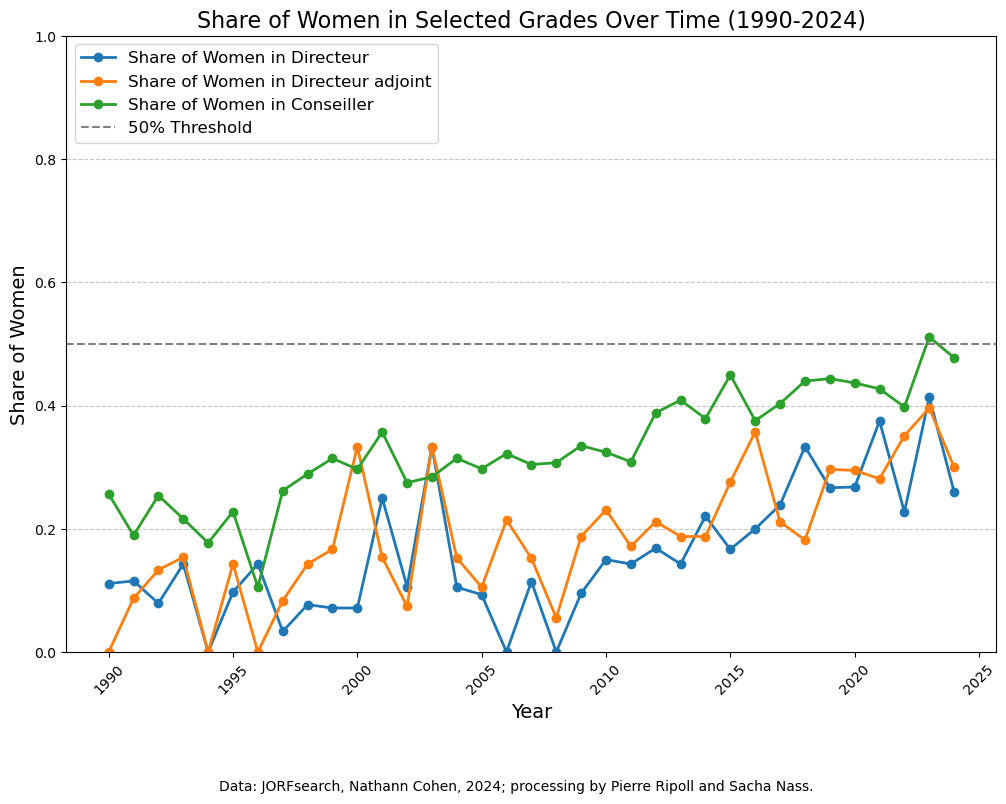

In [ ]:
# Get all unique values of the 'grade' column
unique_grades = nominations_ministerielles['grade'].unique()
print("Unique values in 'grade':")
print(unique_grades)

grades_of_interest = ['Directeur', 'Directeur adjoint', 'Conseiller']

# Initialize a dictionary to store shares per year for each grade
shares_by_grade = {}

for grade in grades_of_interest:
    # Filter data for the current grade
    grade_data = valid_nominations[valid_nominations['grade'] == grade]
    
    # Calculate the share of women per year for the current grade
    shares_by_grade[grade] = (
        grade_data.groupby('year')['sexe']
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        .get('F', 0)  # Get share of women ('F'), default to 0 if no women in a year
    )

# Plotting
plt.figure(figsize=(12, 8))

# Plot a line for each grade
for grade, shares in shares_by_grade.items():
    plt.plot(shares.index, shares, label=f"Share of Women in {grade}", marker='o', linewidth=2)

# Customize the plot
plt.title("Share of Women in Selected Positions Over Time (1990-2024)", fontsize=16)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, label="50% Threshold")
plt.suptitle("Data: JORFsearch, Nathann Cohen, 2024; processing by Pierre Ripoll and Sacha Nass.", fontsize=10, y=-0.05)  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share of Women', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Shares are between 0 and 1
plt.show()
